In [15]:

# Autoreload modules
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
from glob import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
usuario=os.getenv('USER')
home=os.getenv('HOME')
mscanData= home + '/owc/mscanData/' if usuario == 'aalbiol' else home + 'mscanData/'

dir_recortes_in=mscanData + 'rayosX/pollo/recortes_good/'

In [10]:
input_files=glob(dir_recortes_in + '*.png')
print('Number of input files:', len(input_files))   
print('First file:', input_files[0])

Number of input files: 302
First file: /home/aalbiol/owc/mscanData/rayosX/pollo/recortes_good/LOWpechugasTestigo_00001.png


In [12]:
def leepng(filename,maxval=2**16-1):
    z=cv.imread(filename,cv.IMREAD_UNCHANGED).astype(np.float32)/maxval
    return z

In [13]:
z=leepng(input_files[0])

In [14]:
z.shape

(1020, 578, 3)

In [33]:
zf1=cv2.GaussianBlur(z,(7,7),1)
zf2=cv2.GaussianBlur(z,(13,13),2)
zf3=cv2.GaussianBlur(z,(19,19),3)
zf8=cv2.GaussianBlur(z,(51,51),8)

In [34]:
cv2.imwrite('zf1.png',np.uint16(zf1*2**16))
cv2.imwrite('zf2.png',np.uint16(zf2*2**16))
cv2.imwrite('zf3.png',np.uint16(zf3*2**16))
cv2.imwrite('z.png',np.uint16(z*2**16))

True

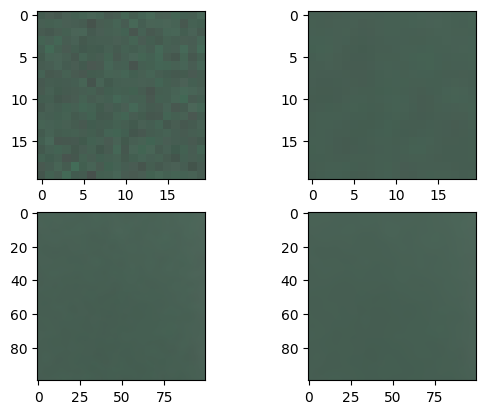

In [35]:
_=plt.subplot(221)
_=plt.imshow(z[190:210,290:310],clim=(0,1))
_=plt.subplot(222)
_=plt.imshow(zf1[190:210,290:310,:],clim=(0,1))  
_=plt.subplot(223)
_=plt.imshow(zf2[150:250,250:350,:],clim=(0,1))
_=plt.subplot(224)
_=plt.imshow(zf3[150:250,250:350,:],clim=(0,1))

In [36]:
print (np.std(z[190:210,290:310,:]))
print (np.std(zf1[190:210,290:310,:]))
print (np.std(zf2[190:210,290:310,:]))
print (np.std(zf3[190:210,290:310,:]))
print (np.std(zf8[190:210,290:310,:]))


0.041884273
0.04022472
0.04014653
0.04015262
0.040161904
